In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv("road_accident_dataset.csv")

In [ ]:
df.head(10)

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414650,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856980,22072.878500,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412980,58009.145120,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212570,20907.151300,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293920,13584.060760,South America,3883.645634
5,India,2010,May,Monday,Evening,Urban,Street,Snowy,479.216834,2,...,4,8.205994,360.951795,Dry,Speeding,7,40980.718160,45995.605250,South America,3626.074027
6,China,2010,March,Monday,Afternoon,Rural,Street,Foggy,386.176217,3,...,3,17.851663,7607.804705,Wet,Weather,9,47248.020240,52342.431810,Asia,3408.182341
7,USA,2016,July,Friday,Afternoon,Rural,Main Road,Foggy,75.608688,3,...,2,46.740367,6061.407002,Dry,Speeding,8,4262.755621,70652.223520,South America,408.296453
8,Japan,2014,August,Thursday,Afternoon,Rural,Highway,Rainy,387.828675,3,...,2,26.543610,3793.850542,Snow-covered,Mechanical Failure,5,37624.775980,13724.630950,Europe,2058.898279
9,USA,2007,April,Monday,Evening,Urban,Highway,Foggy,443.965408,3,...,3,44.693355,1140.429308,Snow-covered,Distracted Driving,0,15801.190080,61948.862750,Australia,1840.206143


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

,Year,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Alcohol Level,Driver Fatigue,Pedestrians Involved,Cyclists Involved,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Insurance Claims,Medical Cost,Economic Loss,Population Density
count,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000
mean,2011.973348,275.038776,2.501227,74.544068,0.125232,0.500576,1.000773,0.998356,9.508205,1.995439,32.491746,5041.929098,4.495621,25198.454901,50437.505615,2506.476223
std,7.198624,129.923625,1.117272,26.001448,0.072225,0.500002,0.816304,0.817764,5.774366,1.412974,15.889537,2860.671611,2.867347,14274.771691,28584.290822,1440.646352
min,2000.000000,50.001928,1.000000,30.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,5.000177,100.062626,0.000000,500.110091,1000.335085,10.002669
25%,2006.000000,162.338860,2.000000,52.000000,0.062630,0.000000,0.000000,0.000000,5.000000,1.000000,18.732879,2560.601300,2.000000,12836.933595,25692.817342,1258.158299
50%,2012.000000,274.672990,3.000000,74.000000,0.125468,1.000000,1.000000,1.000000,9.000000,2.000000,32.534944,5037.909855,4.000000,25188.202670,50395.499875,2506.203333
75%,2018.000000,388.014111,3.000000,97.000000,0.187876,1.000000,2.000000,2.000000,15.000000,3.000000,46.289527,7524.638162,7.000000,37529.024900,75186.626095,3756.652950
max,2024.000000,499.999646,4.000000,119.000000,0.249999,1.000000,2.000000,2.000000,19.000000,4.000000,59.999588,9999.997468,9.000000,49999.930130,99999.622970,4999.991745


In [ ]:
df.isnull().sum()

Country                        0
Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Injuries             0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Region                         0
Population Density             0
dtype: int

In [ ]:
df.columns

Index(['Country', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural',
       'Road Type', 'Weather Conditions', 'Visibility Level',
       'Number of Vehicles Involved', 'Speed Limit', 'Driver Age Group',
       'Driver Gender', 'Driver Alcohol Level', 'Driver Fatigue',
       'Vehicle Condition', 'Pedestrians Involved', 'Cyclists Involved',
       'Accident Severity', 'Number of Injuries', 'Number of Fatalities',
       'Emergency Response Time', 'Traffic Volume', 'Road Condition',
       'Accident Cause', 'Insurance Claims', 'Medical Cost', 'Economic Loss',
       'Region', 'Population Density'],
      dtype='object')

In [ ]:
skew_value = df.skew(numeric_only=True)
print(skew_value)


Year                           0.001133
Visibility Level               0.002267
Number of Vehicles Involved   -0.002733
Speed Limit                   -0.000751
Driver Alcohol Level          -0.002366
Driver Fatigue                -0.002303
Pedestrians Involved          -0.001419
Cyclists Involved              0.003025
Number of Injuries             0.000651
Number of Fatalities           0.004409
Emergency Response Time       -0.001649
Traffic Volume                 0.001068
Insurance Claims               0.002146
Medical Cost                   0.002779
Economic Loss                  0.003046
Population Density            -0.001587
dtype: float64


<Axes: >

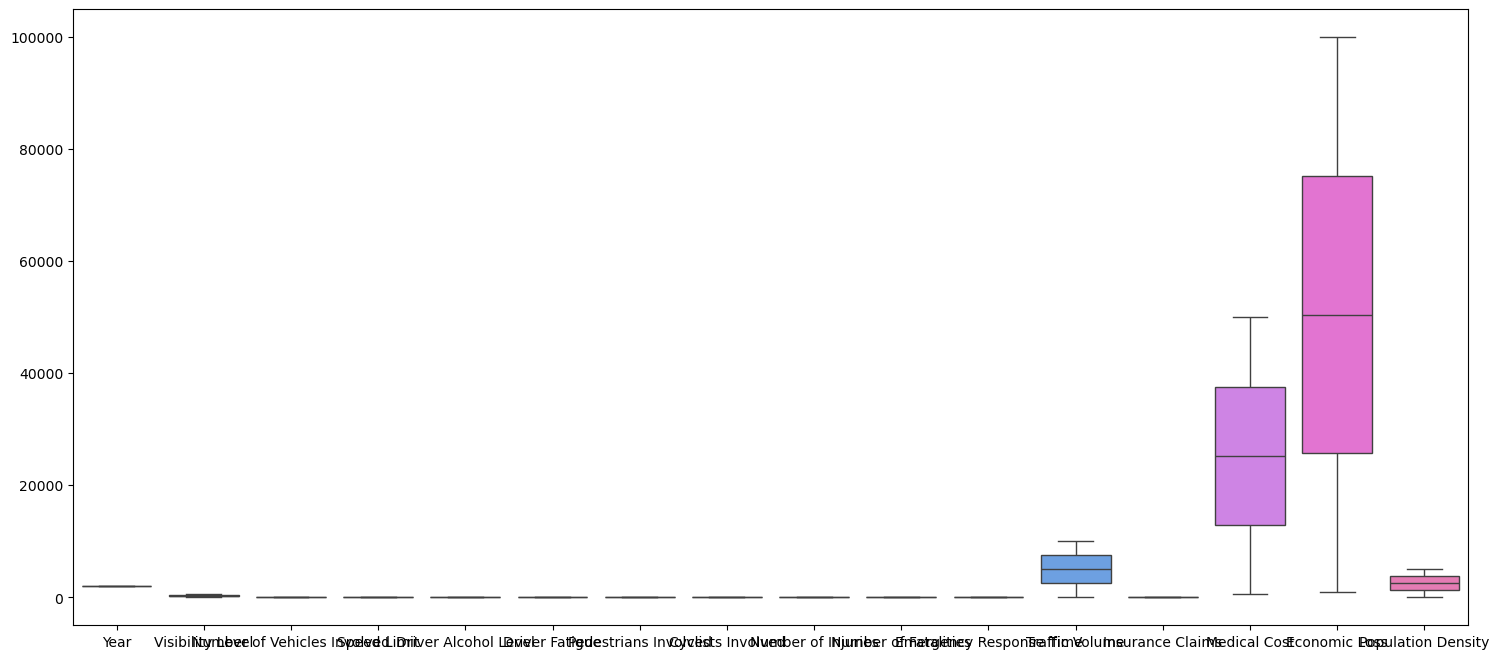

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(df)

In [ ]:


total_accidents = len(df)
total_injuries = df['Number of Injuries'].sum()
avg_speed = df['Speed Limit'].mean()
avg_population = df['Population Density'].mean()

cards = pd.DataFrame({
    "Metric": ["Total Accidents", "Total Injuries", "Average Speed", "Avg Population Density"],
    "Value": [total_accidents, total_injuries, round(avg_speed, 2), round(avg_population, 2)]
})

print(cards)


                   Metric       Value
0         Total Accidents   132000.00
1          Total Injuries  1255083.00
2           Average Speed       74.54
3  Avg Population Density     2506.48


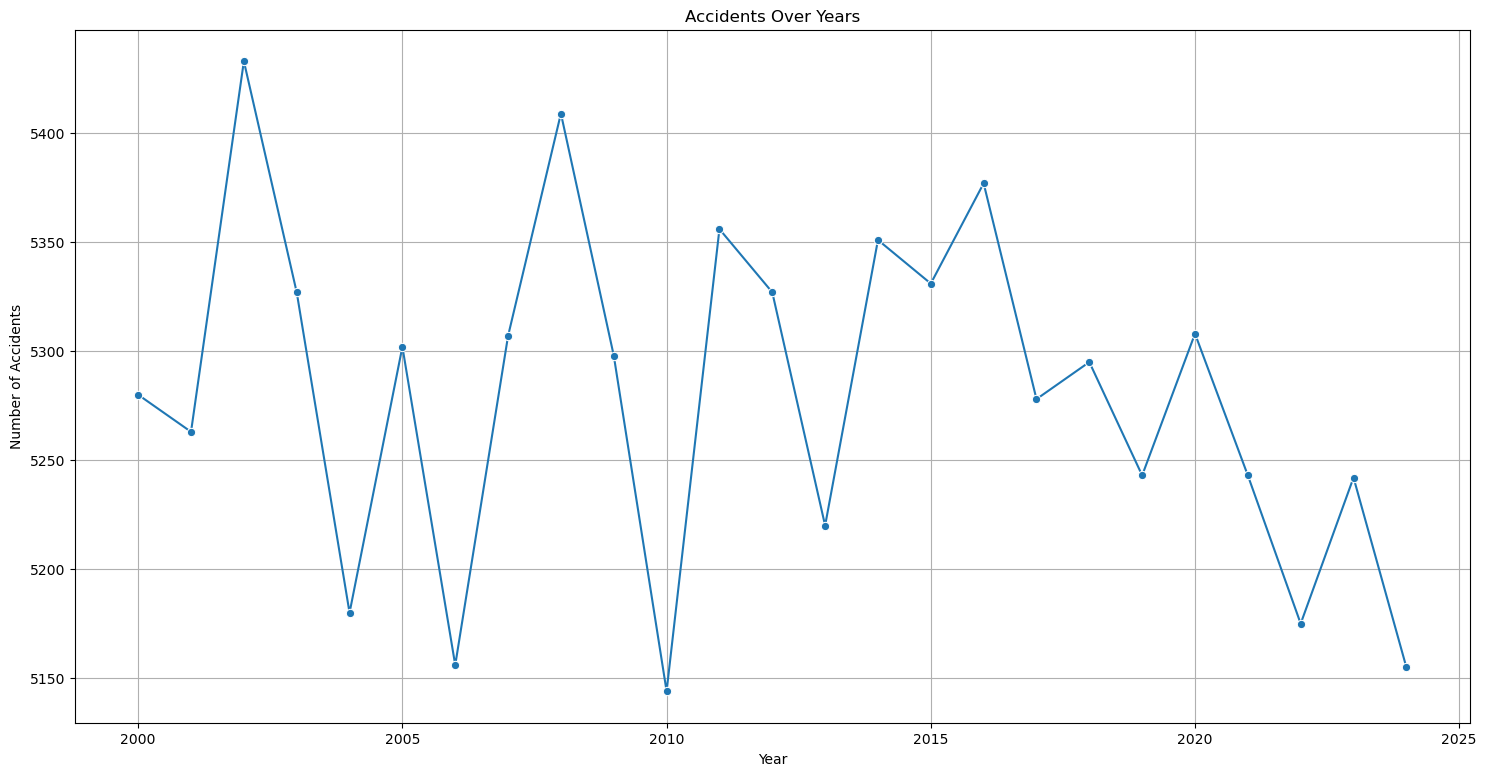

In [ ]:
plt.figure(figsize=(18,9))
yearly_accidents = df.groupby('Year').size().reset_index(name='Accidents')

sns.lineplot(data=yearly_accidents, x='Year', y='Accidents', marker='o')
plt.title("Accidents Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()



[2] Accidents by Month:
Month
April        11063
August       10791
December     10909
February     11064
January      10952
July         11000
June         11122
March        11072
May          11158
November     10836
October      10986
September    11047
Name: count, dtype: int64


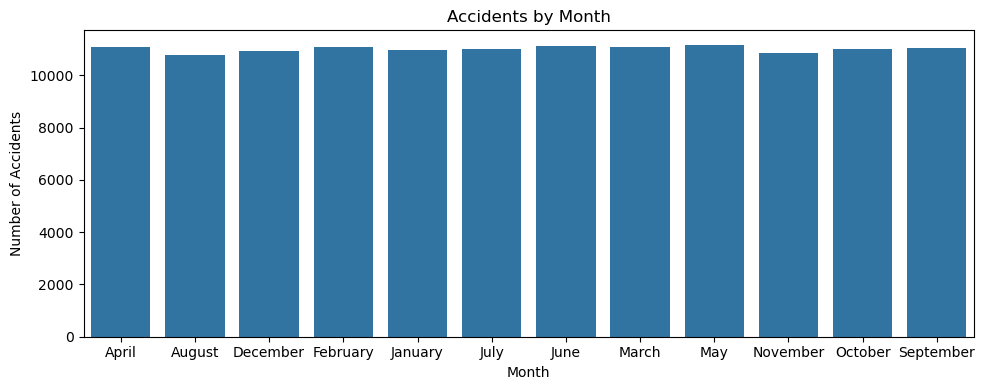

In [ ]:
month_counts = df["Month"].value_counts().sort_index()
print("\n[2] Accidents by Month:")
print(month_counts)

plt.figure(figsize=(10, 4))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()


[3] Accidents by Road Type:
Road Type
Main Road    44197
Highway      43920
Street       43883
Name: count, dtype: int64


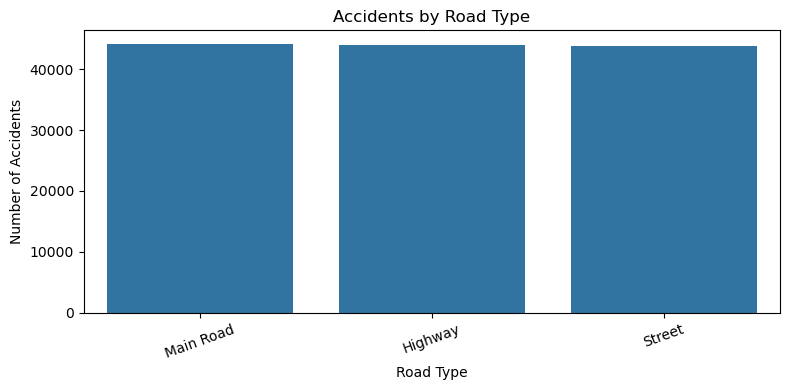

In [ ]:
road_counts = df["Road Type"].value_counts()
print("\n[3] Accidents by Road Type:")
print(road_counts)

plt.figure(figsize=(8, 4))
sns.barplot(x=road_counts.index, y=road_counts.values)
plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


[4] Accidents by Weather Conditions:
Weather Conditions
Windy    26626
Rainy    26562
Clear    26426
Snowy    26249
Foggy    26137
Name: count, dtype: int64


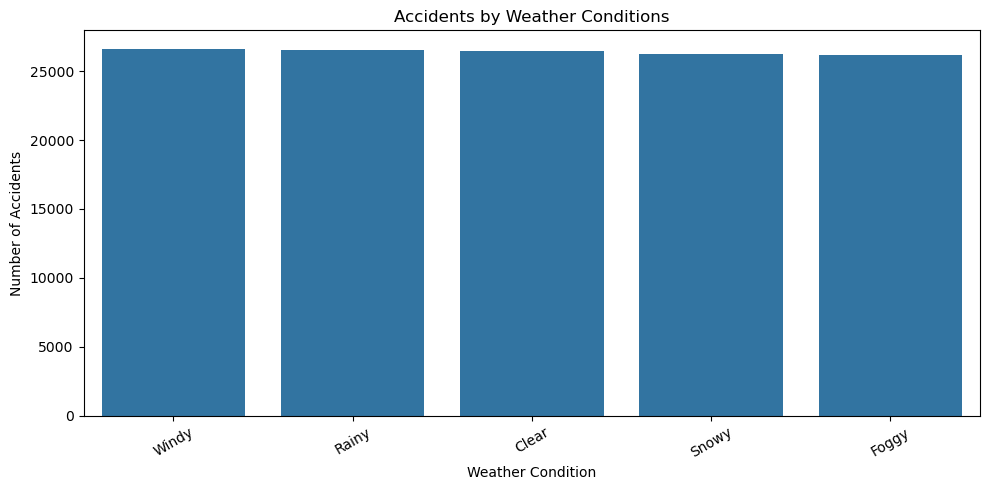

In [ ]:
weather_counts = df["Weather Conditions"].value_counts()
print("\n[4] Accidents by Weather Conditions:")
print(weather_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
vis_counts = df["Visibility Level"].value_counts()
print("\n[5] Accidents by Visibility Level:")
print(vis_counts)


[5] Accidents by Visibility Level:
Visibility Level
324.821643    2
220.414650    1
415.930349    1
481.567459    1
80.693138     1
             ..
384.419969    1
244.441527    1
487.976993    1
357.354182    1
253.531380    1
Name: count, Length: 131999, dtype: int64


In [ ]:
severity_counts = df["Accident Severity"].value_counts()
print("\n[6] Accident Severity Distribution:")
print(severity_counts)

plt.figure(figsize=(7, 4))
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()